# Solution sketch, lab 2

## Johannes Mauritzen

## MET 2010

## NTNU Business School


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)



### 1. In the lab we looked at real GDP expenditure. Now do an analysis with output-side real GDP. 

* Create a new variable called "rgdpo_per_pers" which divides output-side real gdp ("rdgpo") by population ("pop"). 

* Extract a dataframe with Norwegian, Swedish and Danish data and create a chart of the rgdpo_per_pers comparing the three countries.  

* Also do a log transformation and plot. 

* How does this measure of GDP differ from the one above? Can you explain why?

In [3]:
pwt = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/pwt100.csv", sep=";", decimal=",")
pwt["rgdpo_per_pers"] = pwt["rgdpo"]/pwt["pop"]

scanCountries = ["Norway", "Sweden", "Denmark"]

scanData = pwt.loc[pwt.country.isin(scanCountries),["country", "year", "rgdpo_per_pers"]]

  

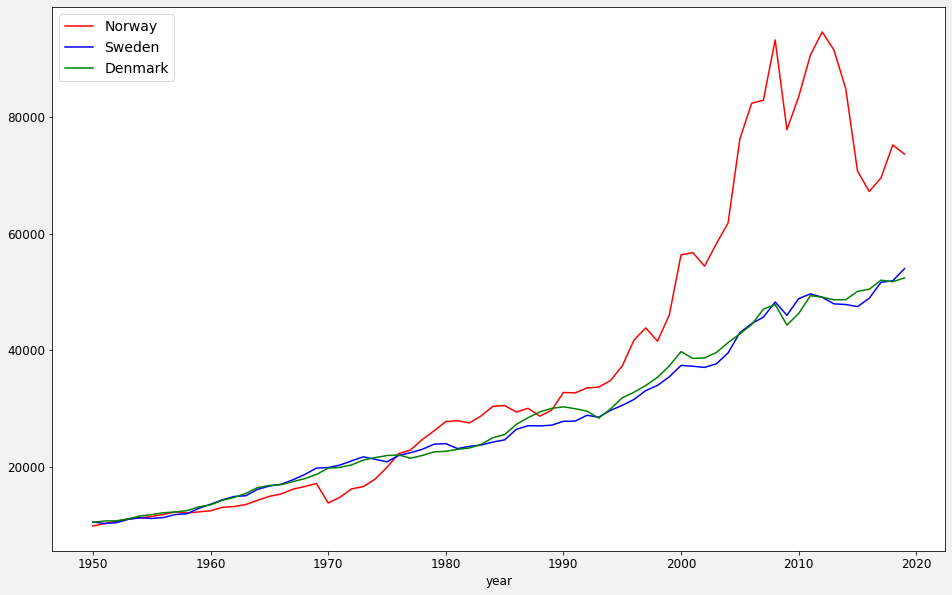

In [4]:
fig, ax = plt.subplots()
scanData.loc[scanData.country=="Norway"].plot(x="year", y="rgdpo_per_pers", color="red", ax=ax, label="Norway")
scanData.loc[scanData.country=="Denmark"].plot(x="year", y="rgdpo_per_pers", color="blue", ax=ax, label="Sweden")
scanData.loc[scanData.country=="Sweden"].plot(x="year", y="rgdpo_per_pers", color="Green", ax=ax, label="Denmark")
plt.show()



lets also create the expenditure side data and plot the norwegian series for both

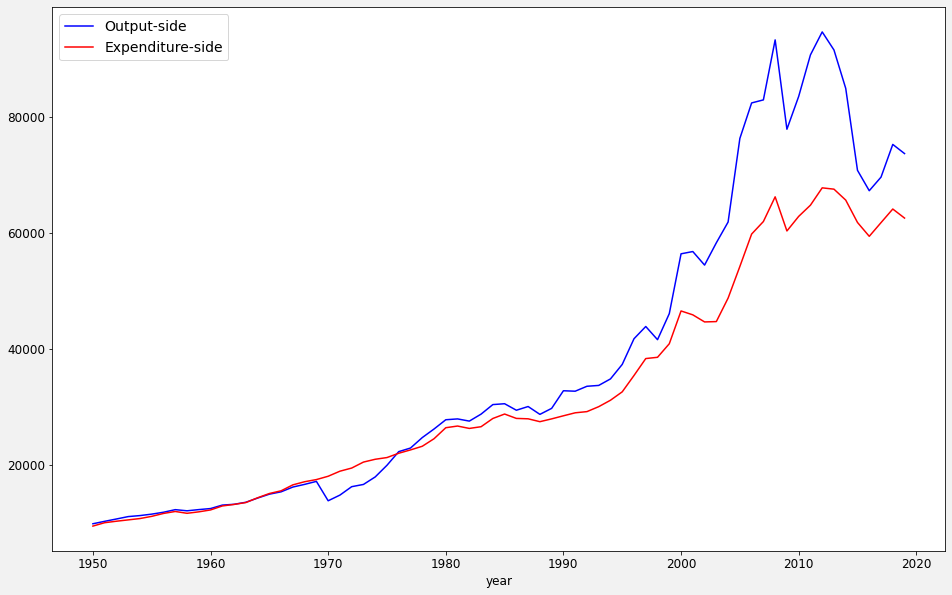

In [12]:
pwt["rgdpe_per_pers"] = pwt["rgdpe"]/pwt["pop"]

norwayData = pwt.loc[pwt.country=="Norway",["country", "year", "rgdpo_per_pers", "rgdpe_per_pers"]]

fig, ax = plt.subplots()
norwayData.plot(x="year", y="rgdpo_per_pers", color="blue", ax=ax, label="Output-side")
norwayData.plot(x="year", y="rgdpe_per_pers", color="red", ax=ax, label="Expenditure-side")

plt.show()

Here we see that the growth in the output side has far outpaced expenditure since about the 1990's. If you take this difference and then take into account of market returns, you will approximately get the value of the oil fund. 

### 2. Creating fake data. 

You might think that faking data would be frowned apon by statisticians, but on the other hand, it is a useful tool in understanding models - also in this course. In this exercise you are going to create your own fake data set. 

* We have a relationship we wish to model which we think has the following form: 

$$y_i = \beta_1*x_{1i} + \beta_2*x_{2i} + e_i$$

Perhaps $y_i$ is the test score on a standardized exam which is a linear function of how much a student, i, studies,  $x_{1i}$, and how high their IQ is, $x_{2i}$, plus some random component $e_i$. 

* Generate NP arrays for $x_{1}$ and $x_{2}$. Generate data for N=1000 students, assuming that both $x_{1i}$ and $x_{2i}$ come from uniform distribution (see lab 1) between 0 and 1. 

* Generate the series $e_i$ which is from a standard normal distribution - mean 0, standard deviation 1. 

* Generate y_i series by letting $\beta_1=.5$ and $\beta_2=-.2$ and computing based on the formula above.

* Create a Pandas data frame with the 4 NP arrays you have created (See [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)).

* Use the Pandas function: [pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) to generate correlation coefficients between your variables. How do these estimates compare to the $\beta_1$ and $\beta_2$ values you chose

<AxesSubplot:xlabel='x1', ylabel='y'>

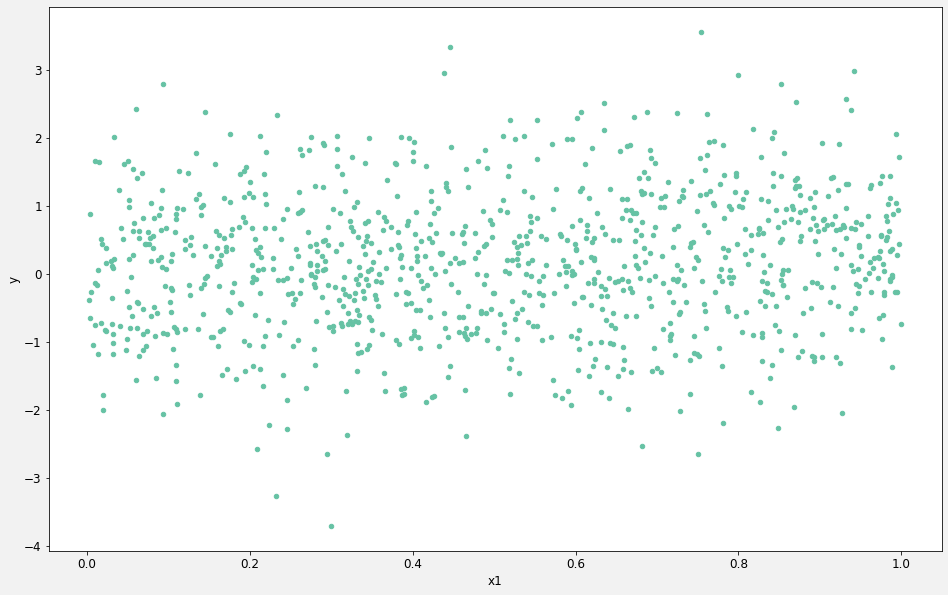

In [3]:
N=1000
x1 = np.random.uniform(0,1,N)
x2 = np.random.uniform(0,1,N)
e = np.random.normal(0,1,N)
beta1 = .5
beta2 = -.2
y = beta1*x1 + beta2*x2 + e

fakeDF = pd.DataFrame({"y":y, "x1":x1, "x2":x2, "e":e})

fakeDF.plot.scatter(x="x1", y="y")

Just looking at the data, it doesn't look like there is much relationship between x1 and y, but that can be deceiving. 

In [19]:
fakeDF.corr()

,y,x1,x2,e
y,1.000000,0.111552,-0.075525,0.987585
x1,0.111552,1.000000,-0.031127,-0.035080
x2,-0.075525,-0.031127,1.000000,-0.013869
e,0.987585,-0.035080,-0.013869,1.000000


From the correlation coefficients, we are picking up some of the direction of the effects of x1 and x2 on y, but this is not a reliable way of estimating the actual coefficients we created. We also notice the high correlation between y and e, which is telling us that a lot of the variation in y is coming from that random component. 

We will be covering regression and multiple regression later in the course, but for now, we can just state that the correct way of getting back our coefficients is to run a regression: 

In [21]:
import statsmodels.formula.api as smf

results = smf.ols(formula="y ~ x1 + x2 -1 ", data=fakeDF).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              16.22
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                    1.17e-07
Time:                        10:38:51   Log-Likelihood:                         -1421.9
No. Observations:                1000   AIC:                                      2848.
Df Residuals:                     998   BIC:                                      2858.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4322      0.082      5.274      0.000       0.271       0.593
x2            -0.1959      0.081     -2.414      0.016      -0.355      -0.037
==============================================================================
Omnibus:                        1.731   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.421   Jarque-Bera (JB):                1.594
Skew:                          -0.073   Prob(JB):                        0.451
Kurtosis:                       3.131   Cond. No.                         2.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Open-ended assignment: 

Find an interesting data set or series, and load it in as as a Pandas data frame or series. Do some initial transformations or cleaning if necessary. Plot the series or multiple series. Try to explain some of the patterns you see. 

You can and should see this as the first step of starting your course project. 

### Solution Sketch

See the section of the lab making use of the Penn World Tables data (but you should try to make use of some alternate dataset, you could see the list of data resources on the course website). 